In [129]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
import glob
from PIL import Image
import numpy as np
import pandas as pd
import time
from sklearn import preprocessing

In [130]:
# read files from directory https://www.tensorflow.org/tutorials/images/classification
# it uses generators to reduce the memory
desire_size = (100,100)
batch_size = 512
train_ds = tf.keras.utils.image_dataset_from_directory(
  "data/train",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=desire_size,
  batch_size=batch_size,
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  "data/train",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=desire_size,
  batch_size=batch_size,
)

class_names = train_ds.class_names

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 4252 files belonging to 11 classes.
Using 3402 files for training.
Found 4252 files belonging to 11 classes.
Using 850 files for validation.


In [131]:
data_augmentation = Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.4),
  tf.keras.layers.RandomZoom(0.4), 
  tf.keras.layers.RandomContrast(0.4),
  # tf.keras.layers.RandomWidth(0.2)
  # tf.keras.layers.RandomTranslation(0.4,0.4)
  # tf.keras.layers.RandomBrightness(0.1)
])

In [132]:
# network using all the channels
model2 = Sequential([
  layers.Rescaling(1./255, input_shape=(desire_size[0], desire_size[1], 3)),
  data_augmentation,
  layers.Conv2D(16, 7, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 7, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 7, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 7, padding='same', activation='relu'),
  layers.MaxPooling2D(),  
  # layers.Conv2D(256, 7, padding='same', activation='relu'),
  # layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(216, activation='relu'),
  layers.Dense(len(class_names))
])
model2.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [133]:
epochs = 15
history = model2.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
) 

Epoch 1/15
7/7 [==============================] - 82s 10s/step - loss: 2.3656 - accuracy: 0.1264 - val_loss: 2.3461 - val_accuracy: 0.1447
Epoch 2/15
7/7 [==============================] - 88s 13s/step - loss: 2.3315 - accuracy: 0.1593 - val_loss: 2.3162 - val_accuracy: 0.1682
Epoch 3/15
7/7 [==============================] - 86s 12s/step - loss: 2.3040 - accuracy: 0.1787 - val_loss: 2.3112 - val_accuracy: 0.1494
Epoch 4/15
7/7 [==============================] - 84s 12s/step - loss: 2.3090 - accuracy: 0.1855 - val_loss: 2.2604 - val_accuracy: 0.2259
Epoch 5/15
7/7 [==============================] - 78s 12s/step - loss: 2.2141 - accuracy: 0.2172 - val_loss: 2.1743 - val_accuracy: 0.2235
Epoch 6/15
7/7 [==============================] - 87s 13s/step - loss: 2.1041 - accuracy: 0.2687 - val_loss: 2.1641 - val_accuracy: 0.2588
Epoch 7/15
7/7 [==============================] - 81s 12s/step - loss: 2.0251 - accuracy: 0.2986 - val_loss: 1.9921 - val_accuracy: 0.3141
Epoch 8/15
7/7 [===========

In [134]:
time.sleep(15)
epochs = 15 
history = model2.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

Epoch 1/15
7/7 [==============================] - 68s 10s/step - loss: 1.5312 - accuracy: 0.4618 - val_loss: 1.3610 - val_accuracy: 0.5529
Epoch 2/15
7/7 [==============================] - 70s 10s/step - loss: 1.3687 - accuracy: 0.5170 - val_loss: 1.2141 - val_accuracy: 0.5729
Epoch 3/15
7/7 [==============================] - 68s 10s/step - loss: 1.3072 - accuracy: 0.5353 - val_loss: 1.2208 - val_accuracy: 0.5871
Epoch 4/15
7/7 [==============================] - 68s 10s/step - loss: 1.2604 - accuracy: 0.5617 - val_loss: 1.0613 - val_accuracy: 0.6518
Epoch 5/15
7/7 [==============================] - 66s 9s/step - loss: 1.3005 - accuracy: 0.5341 - val_loss: 1.0602 - val_accuracy: 0.6529
Epoch 6/15
7/7 [==============================] - 69s 10s/step - loss: 1.2416 - accuracy: 0.5603 - val_loss: 1.1885 - val_accuracy: 0.6012
Epoch 7/15
7/7 [==============================] - 69s 10s/step - loss: 1.2034 - accuracy: 0.5744 - val_loss: 1.3089 - val_accuracy: 0.5153
Epoch 8/15
7/7 [============

In [135]:
time.sleep(15)
epochs = 15
history = model2.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

Epoch 1/15
7/7 [==============================] - 57s 8s/step - loss: 0.8932 - accuracy: 0.6834 - val_loss: 0.8618 - val_accuracy: 0.6918
Epoch 2/15
7/7 [==============================] - 56s 8s/step - loss: 0.9105 - accuracy: 0.6793 - val_loss: 0.8315 - val_accuracy: 0.7129
Epoch 3/15
7/7 [==============================] - 62s 9s/step - loss: 0.8946 - accuracy: 0.6908 - val_loss: 0.7740 - val_accuracy: 0.7459
Epoch 4/15
7/7 [==============================] - 66s 10s/step - loss: 0.8459 - accuracy: 0.7061 - val_loss: 0.7265 - val_accuracy: 0.7471
Epoch 5/15
7/7 [==============================] - 57s 8s/step - loss: 1.0047 - accuracy: 0.6476 - val_loss: 0.9213 - val_accuracy: 0.6824
Epoch 6/15
7/7 [==============================] - 56s 8s/step - loss: 0.9527 - accuracy: 0.6646 - val_loss: 0.8180 - val_accuracy: 0.7388
Epoch 7/15
7/7 [==============================] - 63s 10s/step - loss: 0.8895 - accuracy: 0.6899 - val_loss: 0.7441 - val_accuracy: 0.7435
Epoch 8/15
7/7 [================

In [136]:
time.sleep(15)
epochs = 15
history = model2.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

Epoch 1/15
7/7 [==============================] - 57s 8s/step - loss: 0.6674 - accuracy: 0.7660 - val_loss: 0.6132 - val_accuracy: 0.7788
Epoch 2/15
7/7 [==============================] - 60s 9s/step - loss: 0.7182 - accuracy: 0.7460 - val_loss: 0.6369 - val_accuracy: 0.7835
Epoch 3/15
7/7 [==============================] - 59s 9s/step - loss: 0.6894 - accuracy: 0.7563 - val_loss: 0.5152 - val_accuracy: 0.8447
Epoch 4/15
7/7 [==============================] - 61s 9s/step - loss: 0.6857 - accuracy: 0.7596 - val_loss: 0.5467 - val_accuracy: 0.7965
Epoch 5/15
7/7 [==============================] - 60s 9s/step - loss: 0.6192 - accuracy: 0.7848 - val_loss: 0.5187 - val_accuracy: 0.8106
Epoch 6/15
7/7 [==============================] - 60s 9s/step - loss: 0.6890 - accuracy: 0.7466 - val_loss: 0.6680 - val_accuracy: 0.7553
Epoch 7/15
7/7 [==============================] - 60s 9s/step - loss: 0.6255 - accuracy: 0.7816 - val_loss: 0.4767 - val_accuracy: 0.8412
Epoch 8/15
7/7 [==================

In [137]:
time.sleep(15)
epochs = 15
history = model2.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

Epoch 1/15
7/7 [==============================] - 65s 9s/step - loss: 0.5680 - accuracy: 0.7989 - val_loss: 0.5037 - val_accuracy: 0.8200
Epoch 2/15
7/7 [==============================] - 65s 9s/step - loss: 0.5674 - accuracy: 0.7981 - val_loss: 0.4160 - val_accuracy: 0.8541
Epoch 3/15
7/7 [==============================] - 65s 9s/step - loss: 0.5166 - accuracy: 0.8183 - val_loss: 0.5485 - val_accuracy: 0.8094
Epoch 4/15
7/7 [==============================] - 65s 10s/step - loss: 0.5036 - accuracy: 0.8213 - val_loss: 0.4340 - val_accuracy: 0.8518
Epoch 5/15
7/7 [==============================] - 62s 9s/step - loss: 0.5159 - accuracy: 0.8225 - val_loss: 0.4241 - val_accuracy: 0.8553
Epoch 6/15
7/7 [==============================] - 64s 9s/step - loss: 0.5411 - accuracy: 0.8060 - val_loss: 0.5828 - val_accuracy: 0.8012
Epoch 7/15
7/7 [==============================] - 69s 10s/step - loss: 0.5378 - accuracy: 0.8180 - val_loss: 0.4396 - val_accuracy: 0.8529
Epoch 8/15
7/7 [================

In [138]:
time.sleep(15)
epochs = 15
history = model2.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

Epoch 1/15
7/7 [==============================] - 64s 9s/step - loss: 0.4340 - accuracy: 0.8395 - val_loss: 0.4077 - val_accuracy: 0.8659
Epoch 2/15
7/7 [==============================] - 63s 10s/step - loss: 0.4399 - accuracy: 0.8519 - val_loss: 0.3699 - val_accuracy: 0.8706
Epoch 3/15
7/7 [==============================] - 63s 9s/step - loss: 0.4189 - accuracy: 0.8551 - val_loss: 0.3600 - val_accuracy: 0.8706
Epoch 4/15
7/7 [==============================] - 61s 9s/step - loss: 0.4260 - accuracy: 0.8516 - val_loss: 0.3871 - val_accuracy: 0.8659
Epoch 5/15
7/7 [==============================] - 65s 9s/step - loss: 0.4044 - accuracy: 0.8548 - val_loss: 0.3439 - val_accuracy: 0.8788
Epoch 6/15
7/7 [==============================] - 60s 9s/step - loss: 0.4150 - accuracy: 0.8463 - val_loss: 0.3936 - val_accuracy: 0.8635
Epoch 7/15
7/7 [==============================] - 62s 9s/step - loss: 0.3955 - accuracy: 0.8557 - val_loss: 0.3553 - val_accuracy: 0.8765
Epoch 8/15
7/7 [=================

In [139]:
time.sleep(15)
epochs = 10
history = model2.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

Epoch 1/15
7/7 [==============================] - 69s 10s/step - loss: 0.3877 - accuracy: 0.8542 - val_loss: 0.3460 - val_accuracy: 0.8788
Epoch 2/15
7/7 [==============================] - 68s 10s/step - loss: 0.3879 - accuracy: 0.8545 - val_loss: 0.3485 - val_accuracy: 0.8929
Epoch 3/15
7/7 [==============================] - 70s 10s/step - loss: 0.3731 - accuracy: 0.8663 - val_loss: 0.4042 - val_accuracy: 0.8518
Epoch 4/15
7/7 [==============================] - 69s 10s/step - loss: 0.3714 - accuracy: 0.8610 - val_loss: 0.3085 - val_accuracy: 0.8965
Epoch 5/15
7/7 [==============================] - 69s 10s/step - loss: 0.4280 - accuracy: 0.8389 - val_loss: 0.3983 - val_accuracy: 0.8776
Epoch 6/15
7/7 [==============================] - 75s 11s/step - loss: 0.3815 - accuracy: 0.8586 - val_loss: 0.3579 - val_accuracy: 0.8812
Epoch 7/15
7/7 [==============================] - 71s 10s/step - loss: 0.3705 - accuracy: 0.8627 - val_loss: 0.2996 - val_accuracy: 0.9035
Epoch 8/15
7/7 [===========

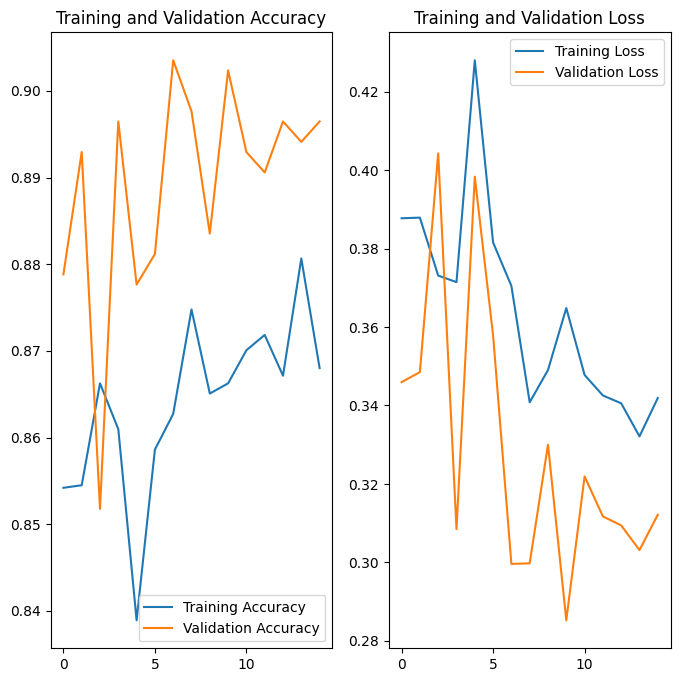

In [140]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [141]:
array_image = []
array_name = []
for file in glob.glob("data/test/*"):
  img = tf.keras.utils.load_img(
    file, 
    target_size=desire_size
  )
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)
  predict = model2.predict(img_array)
  score = tf.nn.softmax(predict[0])
  array_image.append(class_names[np.argmax(score)])
  array_name.append(file.split("\\")[1])

array_image

1/1 [==============================] - 0s 36ms/step


['Loose Silky-bent',
 'Small-flowered Cranesbill',
 'Cleavers',
 'Loose Silky-bent',
 'Sugar beet',
 'Sugar beet',
 'Scentless Mayweed',
 'Scentless Mayweed',
 'Common Chickweed',
 'Fat Hen',
 'Sugar beet',
 'Scentless Mayweed',
 'Loose Silky-bent',
 'Charlock',
 'Black-grass',
 'Scentless Mayweed',
 'Maize',
 'Black-grass',
 'Maize',
 'Loose Silky-bent',
 'Small-flowered Cranesbill',
 'Charlock',
 'Common Chickweed',
 'Fat Hen',
 'Sugar beet',
 'Small-flowered Cranesbill',
 'Common Chickweed',
 'Cleavers',
 'Fat Hen',
 'Loose Silky-bent',
 'Scentless Mayweed',
 'Loose Silky-bent',
 'Scentless Mayweed',
 'Sugar beet',
 'Fat Hen',
 'Loose Silky-bent',
 'Loose Silky-bent',
 'Loose Silky-bent',
 'Loose Silky-bent',
 'Sugar beet',
 'Common Chickweed',
 'Small-flowered Cranesbill',
 'Small-flowered Cranesbill',
 'Small-flowered Cranesbill',
 'Common Chickweed',
 'Loose Silky-bent',
 'Loose Silky-bent',
 'Scentless Mayweed',
 'Black-grass',
 'Loose Silky-bent',
 'Common Chickweed',
 'Fat Hen

In [142]:
df_oob = pd.DataFrame(data= zip(array_name, array_image),
                      columns=["file","species"])
df_oob.to_csv("data/prediction_cnn.csv", index=False)

In [143]:
model2.save('model_3') 

INFO:tensorflow:Assets written to: model_2_gray_form_first\assets


INFO:tensorflow:Assets written to: model_2_gray_form_first\assets
